# **PROBLEM STATEMENT:**

**In this project, we are going to analyze a dataset which contains specifications of two thousand mobile phones and try to predict optimum price ranges for a list of mobile phones in the market by applying various machine learning algorithms such as logistic regression, SVM -Linear, RBF kernel and k-nearest neighbors(KNN).**

## **Importing Libraries**

In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## **Loading The dataset**

In [11]:
df = pd.read_csv("/content/mobile_price_range_data.csv")

## **Exploring Basic Details abouts the dataset**

In [12]:
df.shape

(2000, 21)

We have 2000 samples and 21 attributes.The last attribute is a target attribute, which means that we have labeled data.

In [13]:
df.head(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

so we get all columns names,datatypes,non null count

Here is the attributes of our dataset:

* **id:** ID
* **battery_power:** Total energy a battery can store in one time measured in mAh
* **blue:** Has bluetooth or not
* **clock_speed:** speed at which microprocessor executes instructions
* **dual_sim:** Has dual sim support or not
* **fc**: Front Camera mega pixels
* **four_g:** Has 4G or not
* **int_memory:** Internal Memory in Gigabytes
* **m_dep**: Mobile Depth in cm
* **mobile_wt:** Weight of mobile phone
* **n_cores:** Number of cores of processor
* **pc:** Primary Camera mega pixels
* **px_height**: Pixel Resolution Height
* **px_width:** Pixel Resolution Width
* **ram:** Random Access Memory in Megabytes
* **sc_h:** Screen Height of mobile in cm
* **sc_w:** Screen Width of mobile in cm
* **talk_time:** longest time that a single battery charge will last when you are
* **three_g:** Has 3G or not
* **touch_screen:** Has touch screen or not
* **wifi:** Has wifi or not
* **price_range:** This is the target variable with value of
0 (low cost),
1 (medium cost),
2 (high cost)
3 (very high cost)

In [15]:
#We do not have any null values in our dataset. It will ease the preprocessing step.
pd.isnull(df).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

so we have no null values

In [16]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


1. **Count**: Number of non-null values for each column.
2. **Mean**: Mean value (average) of each column's values.
3. **Std**: Standard deviation, which measures the dispersion or spread of the values in each column.
4. **Min**: Minimum value in each column.
5. **25%**, **50%** (median), and **75%**: Percentiles. These represent the value below which a given percentage of observations fall. The median (50th percentile) divides the dataset into two equal halves.
6. **Max**: Maximum value in each column.



As mentioned above, our data have labels and we will apply supervised learning algorithms.
We define our target column as "y" and rest of the data which are used as inputs as "x".

In [17]:
y=df['price_range']
x=df.drop('price_range', axis=1)
y.unique()

array([1, 2, 3, 0])

**We have four price ranges as target values and will do multi-class classification in our study.**

Let's see our dataset is balanced or imbalanced?
If it is imbalance dataset we want to use over-sampling and under-sampling technique's. Because the balanced dataset has make our predictions more accurate than imbalanced dataset.

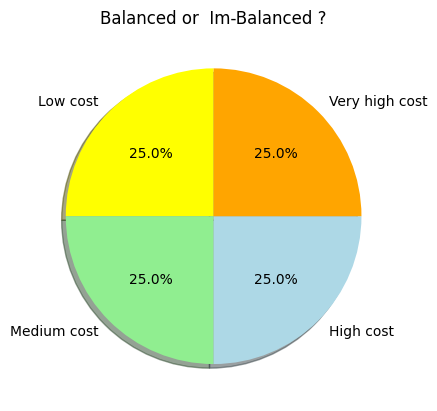

In [20]:
labels = ["Low cost", "Medium cost", "High cost", "Very high cost"]
values = df['price_range'].value_counts().values
colors = ['yellow','lightgreen','lightblue', 'orange']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Balanced or  Im-Balanced ?')
plt.show()

Thus the dataset is balanced

We split our dataset into 'training' and 'test' datasets. And, we are going to see our models' accuracy by applying them on test dataset.

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)
# check whether the split works correctly
print(x_train.shape)
print(x_test.shape)

(1600, 20)
(400, 20)


## **Data Preprocessing**

A real-world data generally contains noises, missing values, and maybe in an unusable format which cannot be directly used for machine learning models. Data preprocessing is required tasks for cleaning the data and making it suitable for a machine learning model which also increases the accuracy and efficiency of a machine learning model.

In [22]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
print(x_train)
print(x_test)

[[ 0.98482338 -0.98634324  0.34554635 ...  0.56387691 -0.99875078
  -1.01257911]
 [-0.67322403  1.01384584 -1.25022721 ...  0.56387691  1.00125078
   0.98757716]
 [-0.40066829  1.01384584  0.22279454 ... -1.7734367   1.00125078
  -1.01257911]
 ...
 [ 0.69409726  1.01384584 -0.02270909 ...  0.56387691 -0.99875078
  -1.01257911]
 [ 0.83491773 -0.98634324 -1.25022721 ...  0.56387691 -0.99875078
   0.98757716]
 [ 0.41245633 -0.98634324 -0.39096452 ...  0.56387691  1.00125078
   0.98757716]]
[[ 0.28299235 -0.98634324 -1.25022721 ...  0.56387691 -0.99875078
  -1.01257911]
 [-1.4409227  -0.98634324 -1.25022721 ...  0.56387691  1.00125078
   0.98757716]
 [-1.49316255 -0.98634324 -0.1454609  ...  0.56387691 -0.99875078
   0.98757716]
 ...
 [-0.59827121  1.01384584 -1.25022721 ...  0.56387691  1.00125078
  -1.01257911]
 [-1.24104849 -0.98634324  1.45031267 ...  0.56387691  1.00125078
   0.98757716]
 [-1.26376147  1.01384584 -0.26821271 ...  0.56387691  1.00125078
  -1.01257911]]


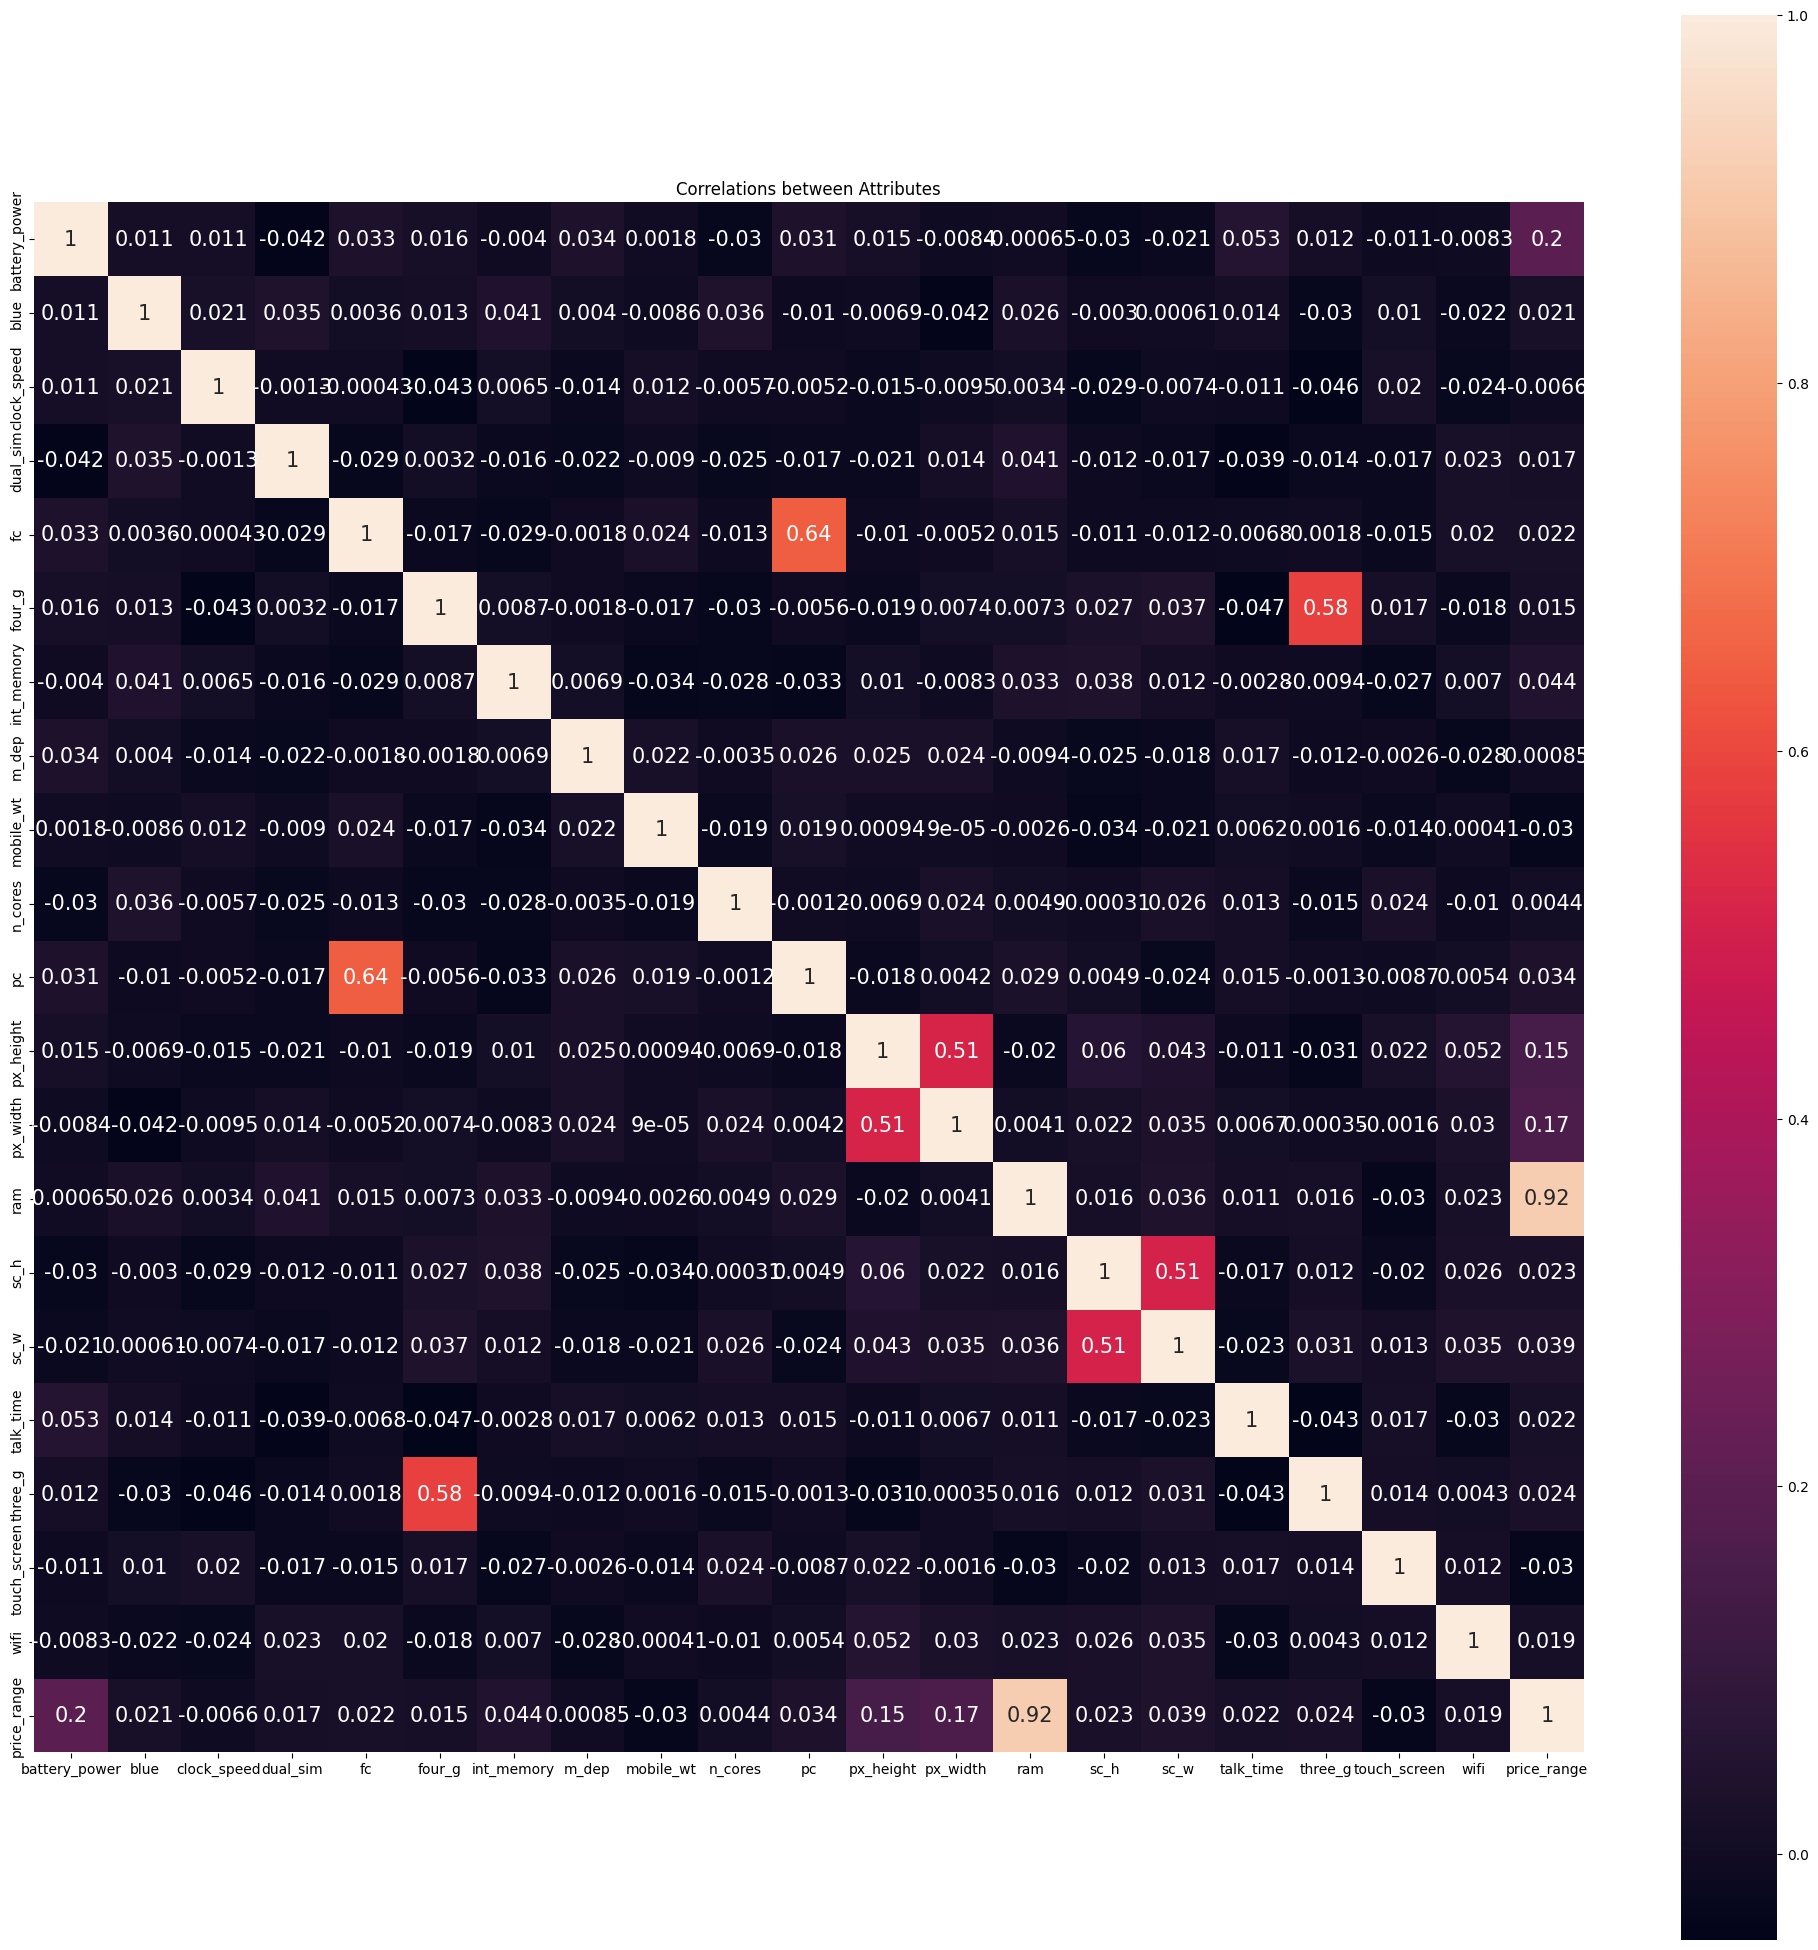

In [28]:
# Before going through machine learning applications,
# let's see the correlation between features and target variable by plotting heatmap:
fig = plt.subplots (figsize = (25, 25))
sns.heatmap(df.corr (), square = True, cbar = True, annot = True, annot_kws = {'size': 15})
plt.title('Correlations between Attributes')
plt.show ()

We see from the heatmap;

* The most influential variable is ram
* Most of the variables have very little correlation to price range
* Primary camera mega pixels and front Camera mega pixels have correlation (it make sense because both of them reflect technology level of resolution of the related phone model) but they do not effect price range.


* 3G and 4G is somewhat correlated
* There is no highly correlated inputs in our dataset, so there is no multicollinearity problem.

## **Implementation Of Machine Learning Algorithms**

To predict the mobile phone prices, we are going to apply below algorithms respectively on the training and validation dataset. After that, we are going to choose the best model for our data set and create target values for test dataset.

* Logistic regression
* SVM Linear Kernel
* RBF Kernel
* KNN

### **Logistic Regression**

Target variables of the data set are discrete, hence, we are going to apply logistic regression model.

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = 'multinomial')
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print(y_pred_lr)

[1 1 2 1 1 1 2 1 1 1 0 1 1 1 1 0 0 1 0 0 3 1 2 3 2 2 2 2 0 0 2 3 0 0 3 0 0
 0 1 1 1 2 3 2 3 0 1 3 3 1 0 0 3 3 3 3 1 3 2 3 2 2 3 1 3 1 0 1 0 2 1 2 3 2
 1 3 3 2 0 2 0 0 2 1 2 2 2 1 0 0 3 2 0 2 0 3 2 0 2 3 0 1 3 3 0 3 0 0 2 0 1
 0 3 2 2 1 1 3 1 0 3 2 2 3 1 2 3 2 1 1 1 0 0 1 0 1 3 0 2 3 1 3 0 0 0 1 1 3
 2 0 3 1 2 2 3 2 2 0 3 2 2 2 2 2 1 2 1 1 3 3 1 2 0 3 1 3 2 2 3 2 2 1 0 1 3
 3 1 2 0 3 1 0 2 2 0 2 0 0 3 0 0 1 3 2 1 3 0 3 2 2 1 2 1 3 1 3 1 0 3 1 2 2
 3 0 2 3 3 0 3 1 1 1 0 2 1 3 1 2 1 0 1 2 1 2 0 3 3 2 3 3 1 3 1 2 3 1 0 2 0
 0 1 3 3 0 1 0 1 1 0 2 3 1 3 2 1 2 1 2 1 3 1 3 1 2 3 2 2 1 2 3 2 3 0 1 1 0
 2 1 0 1 3 3 1 2 3 3 1 2 1 1 2 0 0 0 1 1 3 1 3 2 1 3 1 3 1 1 2 0 1 2 2 2 2
 1 0 0 2 2 1 1 2 1 3 0 0 1 0 2 3 3 2 2 2 2 0 3 2 0 0 2 0 3 3 1 0 1 0 2 0 0
 1 0 0 2 1 2 1 3 2 2 2 1 3 0 0 0 0 0 1 0 3 1 3 1 1 1 3 2 0 2]


**Confusion Matrix:**

A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier. It is used to measure the performance of a classification model. It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score.

In [30]:
from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(y_pred_lr,y_test)
print(lr_acc)
print(confusion_matrix(y_pred_lr,y_test))
pd.crosstab(y_test, y_pred_lr, rownames=['Actual Class'], colnames=['Predicted Class'])

0.9275
[[ 90   2   0   0]
 [  4  98  10   0]
 [  0   2 101   2]
 [  0   0   9  82]]


Predicted Class,0,1,2,3
Actual Class,,,,
0,90,4,0,0
1,2,98,2,0
2,0,10,101,9
3,0,0,2,82


**Classification report**

In [31]:
print(metrics.classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        94
           1       0.88      0.96      0.92       102
           2       0.96      0.84      0.90       120
           3       0.90      0.98      0.94        84

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



**Precision:** Precision is a measure of the accuracy of the classifier for a particular class. It is defined as the ratio of true positive predictions to the total predicted positives.

**Recall (Sensitivity):** Recall is a measure of how well the classifier can identify instances of a class. It is defined as the ratio of true positives to the total actual positives.

**F1-Score:** The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.


**Accuracy:** Overall accuracy of the model across all classes is 93%.
Macro Average: Average of precision, recall, and F1-score across all classes, giving equal weight to each class.

**Weighted Average:** Average of precision, recall, and F1-score across all classes, weighted by the number of samples in each class.

### **K-Nearest Neighbors (KNN)**

In [32]:
#'K' is the number of nearest training points which we classify them using the majority vote.
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train, y_train)
y_pred_knn = model_knn.predict(x_test)
print(metrics.confusion_matrix(y_test, y_pred_knn))
acc_knn=accuracy_score(y_test, y_pred_knn)
print(accuracy_score(y_test, y_pred_knn))
pd.crosstab(y_test, y_pred_knn, rownames=['Actual Class'], colnames=['Predicted Class'])

[[57 30  5  2]
 [47 37 15  3]
 [33 42 26 19]
 [ 3 15 19 47]]
0.4175


Predicted Class,0,1,2,3
Actual Class,,,,
0,57,30,5,2
1,47,37,15,3
2,33,42,26,19
3,3,15,19,47


**Classification report**

In [33]:
print(metrics.classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.41      0.61      0.49        94
           1       0.30      0.36      0.33       102
           2       0.40      0.22      0.28       120
           3       0.66      0.56      0.61        84

    accuracy                           0.42       400
   macro avg       0.44      0.44      0.43       400
weighted avg       0.43      0.42      0.41       400



### **Support Vector Machine (SVM)**

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane. SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.


SVM can be of two types:

**Linear SVM:**

Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.
we use this Linear SVM Kernel Classifier.

**Non-linear SVM:**

Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier. we use this Radial Basis Function Kernel (RBF) Classifier

### **Radial Basis Function Kernel (RBF):**

The similarity between two points in the transformed feature space is an exponentially decaying function of the distance between the vectors and the original input space. RBF is the default kernel used in SVM.

In [34]:
from sklearn.svm import SVC
rbf = SVC(kernel='rbf')
rbf.fit(x_train, y_train)
y_pred_rbf = rbf.predict(x_test)
print(y_pred_rbf)

[1 1 2 1 1 1 2 1 1 1 0 1 1 1 1 0 1 1 0 0 3 1 2 3 2 2 2 2 0 0 2 3 0 0 3 0 0
 0 1 1 1 2 2 2 3 0 2 3 3 1 0 0 2 3 2 2 0 3 2 3 2 2 3 1 3 1 0 0 0 2 1 2 3 2
 1 3 3 2 0 2 0 0 2 2 2 2 2 2 0 0 3 2 0 2 0 3 2 0 2 3 0 2 3 3 0 3 0 0 2 0 1
 0 3 2 1 1 1 3 1 0 3 3 2 3 1 2 3 1 1 1 1 0 0 1 0 2 3 0 2 2 1 3 0 0 0 1 1 3
 2 0 2 0 2 2 3 2 2 0 3 2 2 2 2 2 1 2 2 1 3 3 1 2 0 3 1 3 2 2 3 2 2 1 0 1 2
 2 2 2 0 3 1 0 2 2 0 3 0 0 3 0 1 2 3 2 1 3 0 3 2 2 1 2 1 3 1 3 1 0 3 1 2 2
 3 0 2 3 3 0 3 1 1 2 0 2 1 3 0 2 2 0 1 2 1 2 0 3 3 2 3 3 1 3 1 1 3 1 0 2 0
 1 1 3 3 0 1 0 2 2 0 2 3 1 3 2 1 2 1 2 1 3 2 3 1 2 3 2 2 1 3 3 2 3 0 1 1 0
 2 1 0 1 3 3 1 2 3 2 1 2 1 1 2 0 0 0 1 1 3 1 2 2 1 3 2 3 1 2 2 0 1 2 2 2 2
 1 0 0 2 2 1 1 2 1 3 0 0 1 0 2 3 3 2 2 2 1 0 3 1 0 0 2 0 3 3 1 1 1 0 2 0 0
 1 0 0 2 1 2 1 3 1 2 2 1 3 0 0 0 0 0 1 0 3 1 3 1 1 0 3 2 0 3]


In [35]:
from sklearn.metrics import accuracy_score
rbf_acc = accuracy_score(y_test,y_pred_rbf)
print(rbf_acc)
print(confusion_matrix(y_test,y_pred_rbf))
pd.crosstab(y_test, y_pred_rbf , rownames=['Actual Class'], colnames=['Predicted Class'])

0.8825
[[ 89   5   0   0]
 [  4  86  12   0]
 [  0  11 101   8]
 [  0   0   7  77]]


Predicted Class,0,1,2,3
Actual Class,,,,
0,89,5,0,0
1,4,86,12,0
2,0,11,101,8
3,0,0,7,77


### **Linear SVM :**

In [36]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',random_state=0)
svm.fit(x_train, y_train)
y_pred_svm = rbf.predict(x_test)
print(y_pred_svm)

[1 1 2 1 1 1 2 1 1 1 0 1 1 1 1 0 1 1 0 0 3 1 2 3 2 2 2 2 0 0 2 3 0 0 3 0 0
 0 1 1 1 2 2 2 3 0 2 3 3 1 0 0 2 3 2 2 0 3 2 3 2 2 3 1 3 1 0 0 0 2 1 2 3 2
 1 3 3 2 0 2 0 0 2 2 2 2 2 2 0 0 3 2 0 2 0 3 2 0 2 3 0 2 3 3 0 3 0 0 2 0 1
 0 3 2 1 1 1 3 1 0 3 3 2 3 1 2 3 1 1 1 1 0 0 1 0 2 3 0 2 2 1 3 0 0 0 1 1 3
 2 0 2 0 2 2 3 2 2 0 3 2 2 2 2 2 1 2 2 1 3 3 1 2 0 3 1 3 2 2 3 2 2 1 0 1 2
 2 2 2 0 3 1 0 2 2 0 3 0 0 3 0 1 2 3 2 1 3 0 3 2 2 1 2 1 3 1 3 1 0 3 1 2 2
 3 0 2 3 3 0 3 1 1 2 0 2 1 3 0 2 2 0 1 2 1 2 0 3 3 2 3 3 1 3 1 1 3 1 0 2 0
 1 1 3 3 0 1 0 2 2 0 2 3 1 3 2 1 2 1 2 1 3 2 3 1 2 3 2 2 1 3 3 2 3 0 1 1 0
 2 1 0 1 3 3 1 2 3 2 1 2 1 1 2 0 0 0 1 1 3 1 2 2 1 3 2 3 1 2 2 0 1 2 2 2 2
 1 0 0 2 2 1 1 2 1 3 0 0 1 0 2 3 3 2 2 2 1 0 3 1 0 0 2 0 3 3 1 1 1 0 2 0 0
 1 0 0 2 1 2 1 3 1 2 2 1 3 0 0 0 0 0 1 0 3 1 3 1 1 0 3 2 0 3]


In [37]:
from sklearn.metrics import accuracy_score
svm_acc = accuracy_score(y_test,y_pred_svm)
print(svm_acc)
print(confusion_matrix(y_test,y_pred_svm))
pd.crosstab(y_test, y_pred_svm , rownames=['Actual Class'], colnames=['Predicted Class'])

0.8825
[[ 89   5   0   0]
 [  4  86  12   0]
 [  0  11 101   8]
 [  0   0   7  77]]


Predicted Class,0,1,2,3
Actual Class,,,,
0,89,5,0,0
1,4,86,12,0
2,0,11,101,8
3,0,0,7,77


## **Which model is the most accurate ?**

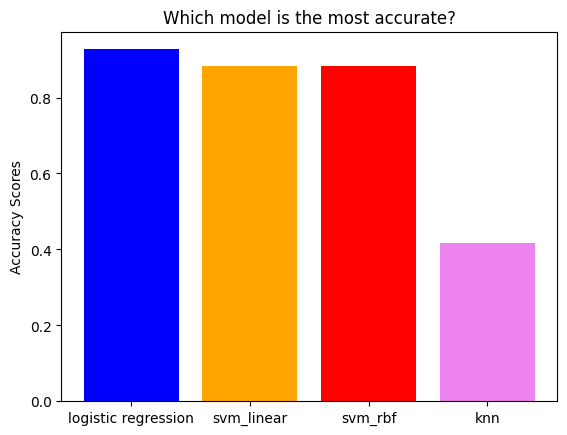

In [38]:
models = ['logistic regression', 'svm_linear', 'svm_rbf', 'knn']
acc_scores = [lr_acc,svm_acc,rbf_acc,acc_knn]

plt.bar(models, acc_scores, color=['blue', 'orange', 'red', 'violet'])
plt.ylabel("Accuracy Scores")
plt.title("Which model is the most accurate?")
plt.show()

After training our dataset with four different model, we conclude that Logistic Regression is best model for our dataset. (via the highest accuracy score = 0.9275)
Finally, we can run our Logistic Regression model to predict target values on the test dataset.

### **Conclusion:**

I have implemented a Mobile Price Prediction using different Machine Learning Algorithms. This project will classify the price range of the mobile price. The price ranges from 0-3. Now I have trained a mobile price classification using 4 Machine Learning algorithms. This model classifies the range of the mobile based on the different parameters like from camera, touch screen, cores, battery, clock speed, internal memory, battery capacity, etc.